In [1]:
import pandas as pd
import statistics as st
import math
import scipy.stats
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('Food-Truck-LineReg.csv', names=['x','y'])
print(data)

          x         y
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


In [6]:
sx=st.stdev(data['x'])
print("Standard Derivation of x",sx)

Standard Derivation of x 3.8698835278823314


In [7]:
sy=st.stdev(data['y'])
print("Standard Derivation of y",sy)

Standard Derivation of y 5.510262255231544


In [39]:
r=scipy.stats.pearsonr(data['x'],data['y'])[0]
print("Correlation coefficient ",r)

Correlation coefficient  0.8378732325263407


In [35]:
import numpy as np
x = data['x']
y = data['y']
n = len(data)
xy=[]
for i in range(len(x)):
    xy.append(x[i]*y[i])
s_x = sum(x)
s_y = sum(y)
x2 = [num**2 for num in x]
y2 = [num**2 for num in y]
nx2 = sum(x2)*n
ny2 = sum(y2)*n

numerator = n*sum(xy) - (s_x*s_y)
denominator = ((nx2 - s_x**2)*(ny2 - s_y**2))**(0.5)
r_val = numerator/denominator
r_val

0.8378732325263435

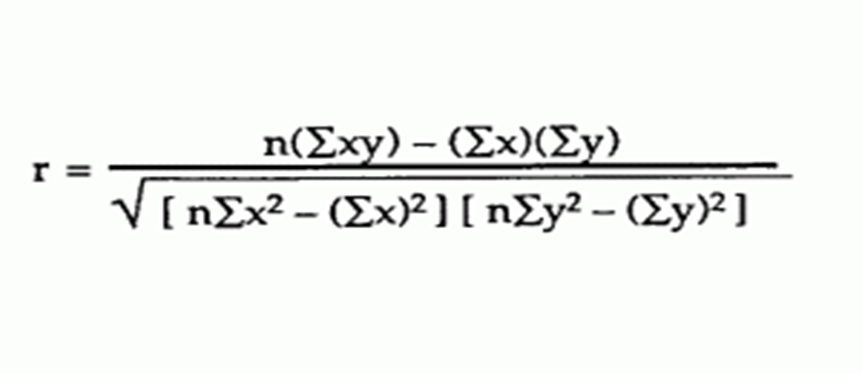

In [9]:
#slope
slope=r*sy/sx
print("Slope",slope)

Slope 1.1930336441895935


In [10]:
mx=st.mean(data['x'])
my=st.mean(data['y'])
print(mx,my)

8.1598 5.839135051546392


In [11]:
c=my-slope*mx
print("c",c)

c -3.895780878311853


In [13]:
y_pred=slope*data['x']+c
print(y_pred)
y1=[]
for i in range(len(data)):
   y1.append(slope*data['x'][i]+c)

0      3.393774
1      2.698951
2      6.267196
3      4.459272
4      3.095158
        ...    
92     3.108162
93     2.433740
94     5.998524
95    12.083712
96     2.590624
Name: x, Length: 97, dtype: float64
[3.393773991050982, 2.6989511966749635, 6.267195523081617, 4.4592723386767075, 3.0951576699103267, 6.10530085756509, 5.023815859107224, 6.338181024910898, 3.8424739446306884, 2.134526979608866, 2.9172763535616584, 13.00234765798955, 2.945074037471276, 6.135723215491924, 2.8337639984683864, 2.5220243072416464, 3.6983554804125855, 2.2246010197451804, 3.7749482403695573, 4.539921413023925, 3.48802364894196, 20.287011089411205, 2.6540931316534344, 3.6514692581959345, 2.7433320482388153, 18.706241510859996, 11.408454709352252, 9.176288761073522, 11.823630417530232, 22.59314512362969, 2.370509034429568, 3.9655950167110543, 7.137632869882347, 3.133334746524394, 5.900337677493318, 5.569032234501868, 5.762900201682677, 2.7927236411082648, 11.417998978505768, 3.6840390766823097, 2.554832

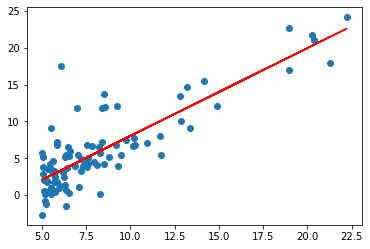

In [14]:
#plotting graph
plt.scatter(data['x'],data['y'])
plt.plot(data['x'],y_pred,color="red")

In [15]:
#cost
cost=abs(data['y']-y_pred)
print("Cost is ",cost.values)

Cost is  [14.19822601  6.4312488   7.39480448  7.39472766  3.72814233  5.78069914
  0.67551586  5.66181898  2.75622606  1.68207302  0.33492365  2.50265234
  0.21002596  1.09007678  2.117584    0.99087569  1.60644452  1.66383102
  0.12314824  0.84937859  0.34942365  1.47998891  1.60890687  1.53603074
  0.33916795  3.93175849  2.09254529  2.12958876  2.86836958  1.55385488
  3.59050903  2.03100498  4.99636713  1.28383475  0.64226232  1.00673223
  1.6465002   0.60007636  1.30099898  1.81336092  1.99826273  0.40377318
  4.68685703  0.55183747  1.29245052  3.52022606  2.9805617   1.18148451
  2.05841276  1.69763436  1.65046859  0.59688379  0.67268159  0.17687322
  2.23616258  5.11170076  1.11395081  1.77162904  3.24920096  1.96858198
  1.46381825  3.02608828  3.56178204  1.83596469  1.66894398  0.16942543
  0.2563525   0.5407115   1.64788834  0.62028352  1.51690814  0.82862438
  1.9914178   1.38386093  4.78217995  3.61930412  1.21352255  3.58846693
  1.60884678  0.14027707  2.45981748  2.08

In [16]:
#sum squared error
sse=sum(cost**2)
print("Sum of Square error ",sse)

Sum of Square error  868.5324469391844


In [17]:
#sum squares of total
sst=sum((data['y']-st.mean(data['y']))**2)
print("Sum of Squares total ",sst)

Sum of Squares total  2914.8470516572247


In [18]:
#sum squares of regression
ssr=sum((y_pred-st.mean(y_pred))**2)
print("Sum of Squares regression ",ssr)

Sum of Squares regression  2046.3146047180385


In [19]:
#r square
rsq=ssr/sst
print("R square",rsq)

R square 0.7020315537841392
